In [4]:
from maze_visualizer import *

In [5]:
def neighbors(maze, current):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    (x, y) = current
    result = []

    for dx, dy in directions:
        nx, ny = x + dx, y + dy

        # Check if the neighbor is within the maze and not a wall
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
            result.append((nx, ny))

    return result

def dls(maze, start, goal, limit):
    return dls_recursive(maze, start, goal, limit, [start])

def dls_recursive(maze, vertex, goal, limit, path):
    if limit < 0:
        return None
    if vertex == goal:
        return path
    for next in neighbors(maze, vertex):
        if next not in path:
            next_path = dls_recursive(maze, next, goal, limit-1, path + [next])
            if next_path:
                return next_path
    return None

def ids(maze, start, goal, max_depth):
    for depth in range(max_depth):
        path = dls(maze, start, goal, depth)
        if path:
            return path
    return None

def find_all_foods_ids(maze, start, foods, max_depth):
    paths = []
    current_position = start

    for food in foods:
        path_to_food = ids(maze, current_position, food, max_depth)

        if path_to_food:
            paths.append(path_to_food)
            current_position = food

    return paths

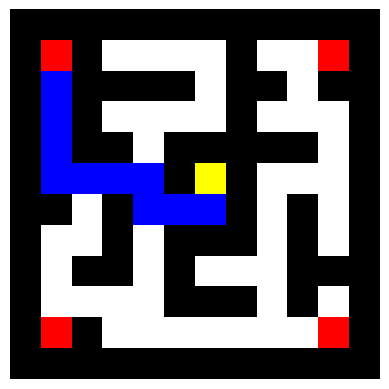

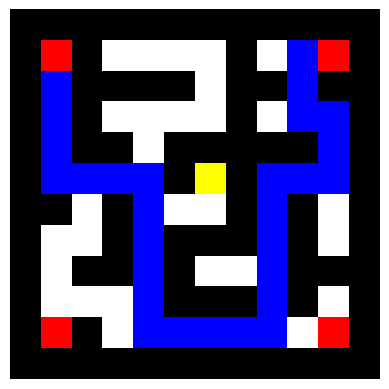

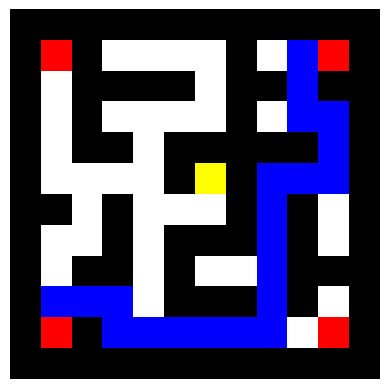

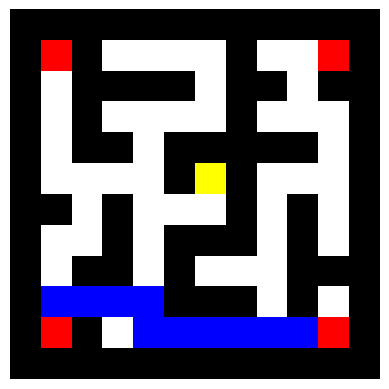

In [19]:
start_pt = (5, 6)
depth_limit = 30
corner_foods = [(1, 1), (1, len(sample_maze[0]) - 2), (len(sample_maze) - 2, 1), (len(sample_maze) - 2, len(sample_maze[0]) - 2)]

ids_paths = find_all_foods_ids(sample_maze, start_pt, corner_foods, depth_limit)

for path in ids_paths:
    show_maze(sample_maze, start_pt, path)